In [1]:
from __future__ import print_function
import fluidsim

In [2]:
from fluidsim.solvers.ns2d.solver import Simul

WARNING  Module C:\Anaconda\lib\site-packages\fluidsim\solvers\ns2d\solver.py has not been compiled for            
         Transonic-Pythran

In [3]:
params = Simul.create_default_params()
params

WARNING  Module C:\Anaconda\lib\site-packages\fluidfft\fft2d\operators.py has not been compiled for                
         Transonic-Pythran

WARNING  Module C:\Anaconda\lib\site-packages\fluidsim\operators\operators2d.py has not been compiled for          
         Transonic-Pythran

C:\Anaconda\lib\site-packages\fluidsim\operators\operators2d.py:35: UserWarning: operators2d.py has to be pythranized to be efficient! Install pythran and recompile.
  warn(


WARNING  Module C:\Anaconda\lib\site-packages\fluidsim\base\time_stepping\pseudo_spect.py has not been compiled for
         Transonic-Pythran

WARNING  Module C:\Anaconda\lib\site-packages\fluidsim\base\output\increments.py has not been compiled for         
         Transonic-Pythran

WARNING  Module C:\Anaconda\lib\site-packages\fluidsim\base\output\spatiotemporal_spectra.py has not been compiled 
         for Transonic-Pythran

WARNING  Module C:\Anaconda\lib\site-packages\fluidsim\solvers\ns2d\output\spatiotemporal_spectra.py has not been  
         compiled for Transonic-Pythran


<params NEW_DIR_RESULTS="True" ONLY_COARSE_OPER="False" beta="0.0" nu_2="0.0"
        nu_4="0.0" nu_8="0.0" nu_m4="0.0" short_name_type_run="">
  <oper Lx="8" Ly="8" NO_KY0="False" NO_SHEAR_MODES="False"
        coef_dealiasing="0.6666666666666666" nx="48" ny="48"
        truncation_shape="cubic" type_fft="default"/>  

  <time_stepping USE_CFL="True" USE_T_END="True" cfl_coef="None" deltat0="0.2"
                 deltat_max="0.2" it_end="10" max_elapsed="None" t_end="10.0"
                 type_time_scheme="RK4">
    <phaseshift_random nb_pairs="1" nb_steps_compute_new_pair="None"/>  

  </time_stepping>

  <init_fields available_types="['from_file', 'from_simul', 'in_script',
               'constant', 'noise', 'jet', 'dipole']" modif_after_init="False"
               type="constant">
    <from_file path=""/>  

    <constant value="1.0"/>  

    <noise length="0.0" velo_max="1.0"/>  

  </init_fields>

  <forcing available_types="['in_script', 'in_script_coarse', 'pseudo_spectral',

In [4]:
params.nu_2 = 1e-3
params.forcing.enable = False

params.init_fields.type = "noise"

params.output.periods_save.spatial_means = 1.0
params.output.periods_save.spectra = 1.0
params.output.periods_save.phys_fields = 2.0


In [5]:
# simulation object
sim = Simul(params) 

*************************************
Program fluidsim
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
C:\Users\Nitish Borade\Sim_data\NS2D_48x48_S8x8_2023-01-06_14-26-21
init_fields.type: noise

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields2d.PhysFieldsBase2D'>
sim.output.spatial_means:     <class 'fluidsim.solvers.ns2d.output

In [6]:
sim.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t0000.000.nc
    compute until t =         10
it =      0 ; t =            0 ; deltat  =   0.097144
              energy = 9.159e-02 ; Delta energy = +0.000e+00

MEMORY_USAGE:                  203.98046875 Mo
it =     11 ; t =      1.09076 ; deltat  =    0.10203
              energy = 9.061e-02 ; Delta energy = -9.864e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  203.9921875 Mo
it =     20 ; t =       2.0249 ; deltat  =     0.1043
              energy = 8.977e-02 ; Delta energy = -8.323e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  204.578125 Mo
save state_phys in file state_phys_t0002.025.nc
it =     30 ; t =      3.06543 ; deltat  =    0.10186
              energy = 8.886e-02 ; Delta energy = -9.103e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  204.609375 Mo
i

In [7]:
from fluidsim import load_sim_for_plot
from fluidsim import load_state_phys_file
print(load_sim_for_plot.__doc__)
print(load_state_phys_file.__doc__)

Create a object Simul from a dir result.

    Creating simulation objects with this function should be fast because the
    state is not initialized with the output file and only a coarse operator is
    created.

    Parameters
    ----------

    name_dir : str (optional)

      Name of the directory of the simulation. If nothing is given, we load the
      data in the current directory.
      Can be an absolute path, a relative path, or even simply just
      the name of the directory under $FLUIDSIM_PATH.

    merge_missing_params : bool (optional, default == False)

      Can be used to load old simulations carried out with an old fluidsim
      version.

    hide_stdout : bool (optional, default == False)

      If True, without stdout.

    
Create a simulation from a file.

    For large resolution, creating a simulation object with this function can
    be slow because the state is initialized with the output file.

    Parameters
    ----------

    name_dir : str (optional)


In [8]:
sim = load_state_phys_file(sim.output.path_run)

*************************************
Program fluidsim
Load state from file:
[...]Borade\Sim_data\NS2D_48x48_S8x8_2023-01-06_14-26-21\state_phys_t0010.010.nc
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
C:\Users\Nitish Borade\Sim_data\NS2D_48x48_S8x8_2023-01-06_14-26-21
init_fields.type: from_file

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base

In [9]:
print(sim.info.__class__)
print([attr for attr in dir(sim.info) if not attr.startswith("_")])

<class 'fluiddyn.util.paramcontainer.ParamContainer'>
['params', 'solver']


In [10]:
sim.info.solver is sim.info_solver

True

In [11]:
sim.info.params is sim.params

True

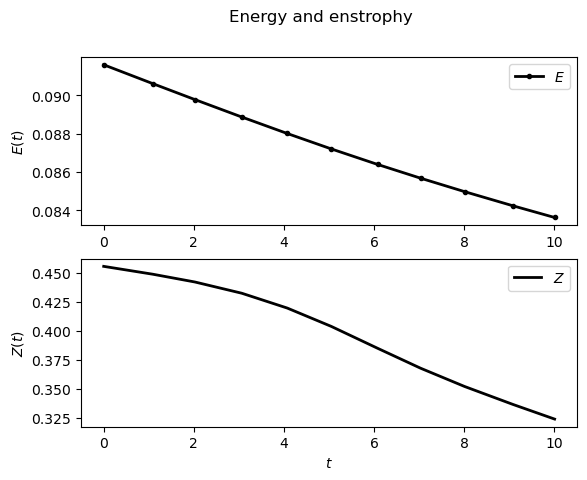

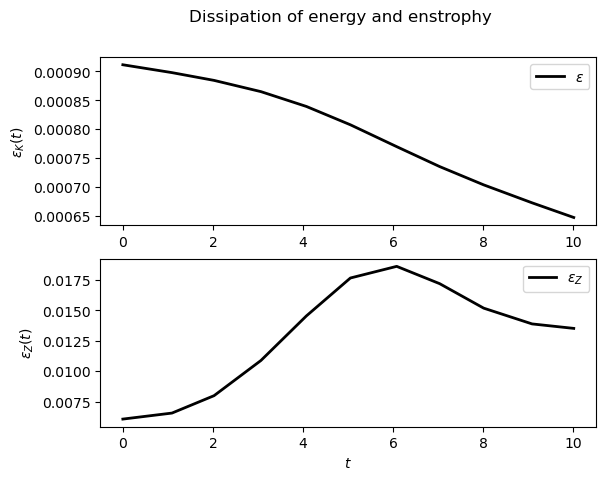

In [12]:
sim.output.spatial_means.plot()